In [49]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [70]:
df = pd.read_csv('SFPD2016.csv')

In [79]:
building_type = pd.read_csv('Building_Permits.csv')

/Users/Sitang/anaconda/envs/dsi/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [80]:
building_type_sample = building_type.sample(frac=0.05)

In [95]:
street_cleaning = pd.read_csv('311_case_records/Street_and_Sidewalk_Cleaning.csv')

In [97]:
df.head(2)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,100475254,1,97,0,08/26/2016,08:00,5,0,14556,-122.427271,37.798134,"(37.7981336020854, -122.427270640646)",10047525404134
1,100475254,37,692,0,08/26/2016,08:00,5,0,14556,-122.427271,37.798134,"(37.7981336020854, -122.427270640646)",10047525463010


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117270 entries, 0 to 117269
Data columns (total 13 columns):
IncidntNum    117270 non-null int64
Category      117270 non-null object
Descript      117270 non-null object
DayOfWeek     117270 non-null object
Date          117270 non-null object
Time          117270 non-null object
PdDistrict    117269 non-null object
Resolution    117270 non-null object
Address       117270 non-null object
X             117270 non-null float64
Y             117270 non-null float64
Location      117270 non-null object
PdId          117270 non-null int64
dtypes: float64(2), int64(2), object(9)
memory usage: 11.6+ MB


In [35]:
cat = df['Category'].value_counts()
cat.head(10)

LARCENY/THEFT     30734
OTHER OFFENSES    15425
NON-CRIMINAL      14175
ASSAULT           10705
VANDALISM          6545
VEHICLE THEFT      5045
WARRANTS           4781
BURGLARY           4587
SUSPICIOUS OCC     4422
DRUG/NARCOTIC      3478
Name: Category, dtype: int64

In [36]:
cat_dis = df.groupby(['PdDistrict', 'Category'])['Category'].size().sort_values(ascending=False).reset_index()
cat_dis.rename(columns={0: 'Number of Crimes'}, inplace=True)
cat_dis.head(10)

,PdDistrict,Category,Number of Crimes
0,SOUTHERN,LARCENY/THEFT,7025
1,NORTHERN,LARCENY/THEFT,5480
2,CENTRAL,LARCENY/THEFT,5250
3,SOUTHERN,OTHER OFFENSES,2665
4,SOUTHERN,NON-CRIMINAL,2631
5,RICHMOND,LARCENY/THEFT,2441
6,MISSION,OTHER OFFENSES,2297
7,MISSION,LARCENY/THEFT,2158
8,TARAVAL,LARCENY/THEFT,2013
9,BAYVIEW,OTHER OFFENSES,1892


In [37]:
other_offenses = df[df['Category'] == 'OTHER OFFENSES']

In [38]:
other_offenses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15425 entries, 13 to 117258
Data columns (total 13 columns):
IncidntNum    15425 non-null int64
Category      15425 non-null object
Descript      15425 non-null object
DayOfWeek     15425 non-null object
Date          15425 non-null object
Time          15425 non-null object
PdDistrict    15425 non-null object
Resolution    15425 non-null object
Address       15425 non-null object
X             15425 non-null float64
Y             15425 non-null float64
Location      15425 non-null object
PdId          15425 non-null int64
dtypes: float64(2), int64(2), object(9)
memory usage: 1.6+ MB


In [39]:
#in other offensens, what are the most common descriptions
other_off_descr = other_offenses['Descript'].value_counts()
other_off_descr.head(10)

DRIVERS LICENSE, SUSPENDED OR REVOKED             2890
TRAFFIC VIOLATION ARREST                          1686
TRAFFIC VIOLATION                                 1408
RESISTING ARREST                                  1069
MISCELLANEOUS INVESTIGATION                        916
FALSE PERSONATION TO RECEIVE MONEY OR PROPERTY     854
LOST/STOLEN LICENSE PLATE                          837
PROBATION VIOLATION                                666
VIOLATION OF RESTRAINING ORDER                     494
POSSESSION OF BURGLARY TOOLS                       489
Name: Descript, dtype: int64

In [40]:
#sorted gps locations
gps = df['Location'].value_counts()

In [41]:
other_cri = df[df['Category'] == 'NON-CRIMINAL']
other_cri.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
2,100475254,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Friday,08/26/2016,08:00,NORTHERN,"ARREST, BOOKED",UNION ST / GOUGH ST,-122.427271,37.798134,"(37.7981336020854, -122.427270640646)",10047525464020
7,140776777,NON-CRIMINAL,PROPERTY FOR IDENTIFICATION,Thursday,09/15/2016,07:40,INGLESIDE,"ARREST, BOOKED",SILVER AV / CAMELLIA AV,-122.432326,37.729271,"(37.7292705199592, -122.432325871028)",14077677773000
11,160008566,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016,03:30,NORTHERN,NONE,CHESTNUT ST / AVILA ST,-122.440312,37.800301,"(37.8003013096043, -122.440312380104)",16000856671000
25,160008801,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016,22:00,INGLESIDE,NONE,BANKS ST / TOMPKINS AV,-122.412860,37.737035,"(37.7370351099671, -122.412860391572)",16000880171000
30,160009053,NON-CRIMINAL,"AIDED CASE, DOG BITE",Monday,01/04/2016,10:30,RICHMOND,NONE,GEARY BL / ARGUELLO BL,-122.458861,37.781255,"(37.7812550935484, -122.45886061567)",16000905364010


In [42]:
other_cri_des = other_cri['Descript'].value_counts()
other_cri_des.head(10)

AIDED CASE, MENTAL DISTURBED                3686
LOST PROPERTY                               3473
FOUND PROPERTY                              2540
AIDED CASE                                   860
DEATH REPORT, CAUSE UNKNOWN                  575
AIDED CASE -PROPERTY FOR DESTRUCTION         334
CASE CLOSURE                                 330
STAY AWAY OR COURT ORDER, NON-DV RELATED     308
COURTESY REPORT                              230
SEARCH WARRANT SERVICE                       220
Name: Descript, dtype: int64

In [43]:
#crime addresses
cri_add = df['Address'].value_counts()
cri_add.head(10)

800 Block of BRYANT ST          2724
800 Block of MARKET ST          1078
1000 Block of POTRERO AV         505
900 Block of MARKET ST           434
0 Block of UNITEDNATIONS PZ      391
500 Block of JOHNFKENNEDY DR     390
600 Block of VALENCIA ST         318
1100 Block of FILLMORE ST        313
3200 Block of 20TH AV            313
300 Block of EDDY ST             293
Name: Address, dtype: int64

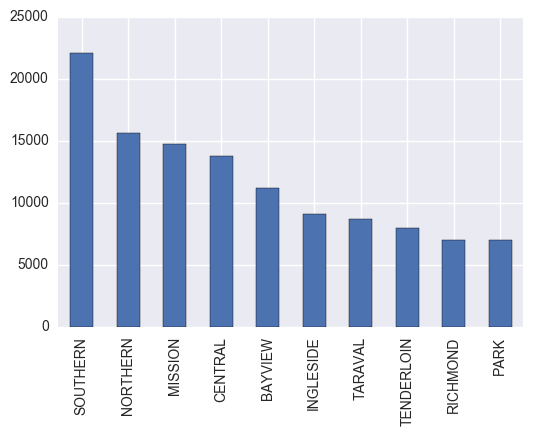

In [57]:
district = df['PdDistrict'].value_counts()
district.plot(kind='bar')

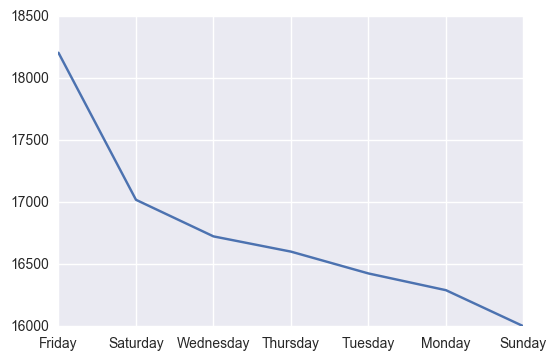

In [54]:
dayofweek = df['DayOfWeek'].value_counts()
dayofweek.plot()

In [78]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
la= LabelEncoder()
cat_col = ['Category', 'Descript', 'DayOfWeek', 'PdDistrict', 'Resolution', 'Address']
df[cat_col] = df[cat_col].apply(lambda x: la.fit_transform(x))

In [82]:
df.head(2)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,100475254,1,97,0,08/26/2016,08:00,5,0,14556,-122.427271,37.798134,"(37.7981336020854, -122.427270640646)",10047525404134
1,100475254,37,692,0,08/26/2016,08:00,5,0,14556,-122.427271,37.798134,"(37.7981336020854, -122.427270640646)",10047525463010


In [86]:
building_type_sample.head(2)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Use Codes,Use Code Description,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location
834720,200405274946,8,otc alterations permit,05/27/2004,1130,005,1039,NaN,Broderick,St,...,24,apartments,5,wood frame (5),5,wood frame (5),2.0,Western Addition,94115.0,"(37.7799079168976, -122.440796784342)"
27088,8702567,8,otc alterations permit,02/26/1987,6490,003,230,NaN,Lowell,St,...,61,storage shed,NaN,NaN,NaN,NaN,11.0,Excelsior,94112.0,"(37.7092274018668, -122.445634026135)"


In [94]:
#building_type_sample['Use Code Description'].value_counts()

In [91]:
geo_feature = ['Use Codes', 'Use Code Description', 'Neighborhoods - Analysis Boundaries', 'Zipcode', 'Location']

In [47]:
from geopy.geocoders import Nominatim
